# Analysis 
Further work: see only the best performing models and see if these have effects. (Top N of each)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
results = pd.read_csv("./data/model_results.csv", index_col = 0)
results

,Recon Loss,Learning Rate,DetEval,batch size,hidden size,latent size,fixed variance,dropout rate,L2 weight,noise layer std,optimizer,nonlinearity,residual user info,RMSE
0,MSE,0.00005,False,128.0,4096.0,512.0,0.0,0.5,0.00001,0.1,Adam,LeakyRelu,True,1.217142
1,MSE,0.00001,False,32.0,4096.0,1024.0,0.3,0.0,0.00000,0.5,RMSProp,Tanh,True,0.969229
2,MSE,0.00005,True,32.0,2048.0,2048.0,0.5,0.1,0.00000,0.1,Adam,Tanh,True,0.793748
3,Likelihood,0.00005,True,64.0,1024.0,512.0,0.1,0.3,0.00000,0.0,Adagrad,Relu,True,1.728256
4,MSE,0.00010,True,64.0,2048.0,512.0,0.5,0.3,0.00010,0.1,Adam,Relu,True,1.214385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Likelihood,0.00005,True,32.0,2048.0,2048.0,0.3,0.5,0.00010,0.3,Adam,Tanh,True,0.995720
0,MSE,0.00010,False,64.0,4096.0,2048.0,0.0,0.3,0.00100,0.3,Adam,Tanh,True,0.851886
0,MSE,0.00005,True,64.0,2048.0,512.0,0.3,0.3,0.00010,0.5,Adam,Sigmoid,False,1.235472
0,Likelihood,0.00005,False,128.0,4096.0,512.0,0.5,0.1,0.00000,0.1,Adagrad,Relu,True,1.410216


# Question 1: Does deterministic evaluation help?

The data suggests that it has a negligible effect on the outcome of the model. 

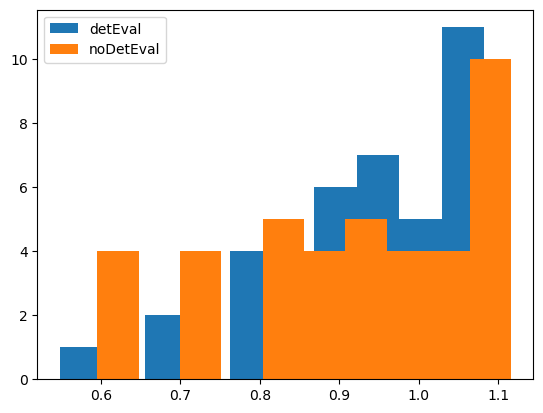

In [12]:
detEval = results[results.DetEval == True].RMSE.sort_values().head(40)
noDetEval = results[results.DetEval == False].RMSE.sort_values().head(40)
plt.hist(detEval)
plt.hist(noDetEval)
plt.legend(['detEval', 'noDetEval'])

In [4]:
print("The mean of detEval = " + str(detEval.mean()))
print("The mean of noDetEval = " + str(noDetEval.mean()))
print("The median of detEval = " + str(detEval.median()))
print("The median of noDetEval = " + str(noDetEval.median()))
print("The std of detEval = " + str(detEval.std()))
print("The std of noDetEval = " + str(noDetEval.std()))


The mean of detEval = 0.8834948201974233
The mean of noDetEval = 0.8619873821735382
The median of detEval = 0.8945890665054321
The median of noDetEval = 0.8975099325180054
The std of detEval = 0.11427558185813792
The std of noDetEval = 0.13645972223721575


# Question 2: Does Fixed variance help?
It appears that Fixed Variance had a negligible effect as well. However, this could also be taken as: the extra hyperparameters are not worth it and better spent elsewhere. 

Check each value of fixed var and see if any stand out

[0.5, 2.0, 0.5, 2.0, 0.5, 2.0, 0.5, 2.0]

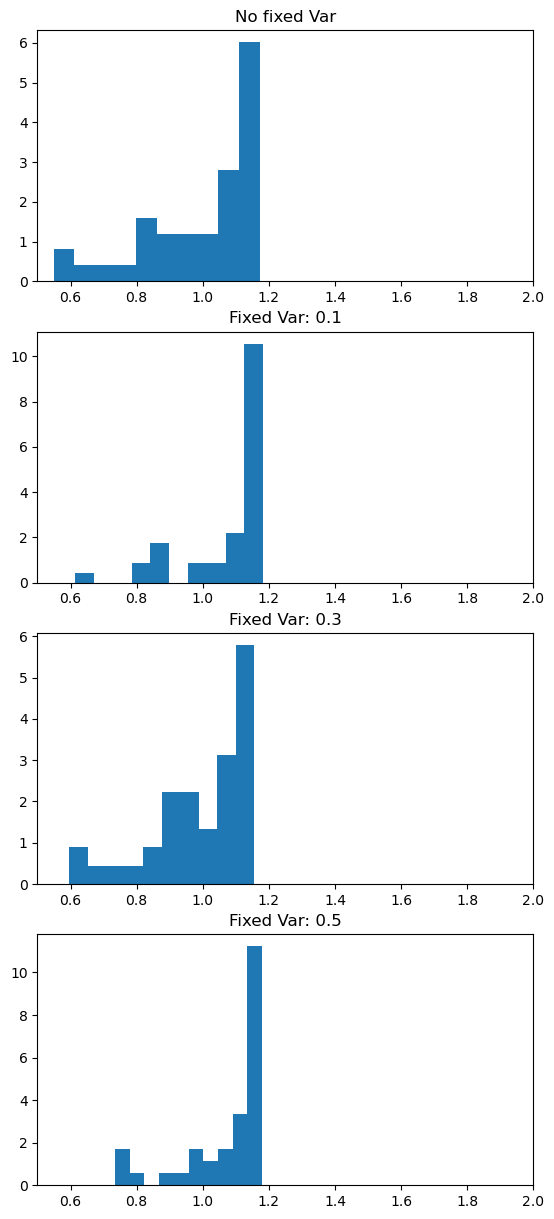

In [13]:
noFixedVar = results[results["fixed variance"] == 0.0].RMSE.sort_values().head(40)
fixedVar1 = results[results["fixed variance"] == 0.1].RMSE.sort_values().head(40)
fixedVar3 = results[results["fixed variance"] == 0.3].RMSE.sort_values().head(40)
fixedVar5 = results[results["fixed variance"] == 0.5].RMSE.sort_values().head(40)
fig, ax = plt.subplots(4)
fig.set_figheight(15)

ax[0].hist(noFixedVar, density=True)
ax[0].title.set_text("No fixed Var")
ax[1].hist(fixedVar1, density =True)
ax[1].title.set_text("Fixed Var: 0.1")
ax[2].hist(fixedVar3, density =True)
ax[2].title.set_text("Fixed Var: 0.3")
ax[3].hist(fixedVar5, density =True)
ax[3].title.set_text("Fixed Var: 0.5")
plt.setp(ax, xlim=[0.5, 2.0])

In [14]:
print("The mean of noFixedVar = " + str(noFixedVar.mean()))
print("The mean of fixedVar1 = " + str(fixedVar1.mean()))
print("The mean of fixedVar3 = " + str(fixedVar3.mean()))
print("The mean of fixedVar5 = " + str(fixedVar5.mean()))
print("")
print("The median of noFixedVar = " + str(noFixedVar.median()))
print("The median of fixedVar1 = " + str(fixedVar1.median()))
print("The median of fixedVar3 = " + str(fixedVar3.median()))
print("The median of fixedVar5 = " + str(fixedVar5.median()))
print("")
print("The std of noFixedVar = " + str(noFixedVar.std()))
print("The std of fixedVar1 = " + str(fixedVar1.std()))
print("The std of fixedVar3 = " + str(fixedVar3.std()))
print("The std of fixedVar5 = " + str(fixedVar5.std()))

The mean of noFixedVar = 1.0028623521327973
The mean of fixedVar1 = 1.0792005047202111
The mean of fixedVar3 = 0.9945562303066253
The mean of fixedVar5 = 1.075222374498844

The median of noFixedVar = 1.074707269668579
The median of fixedVar1 = 1.1512169241905212
The median of fixedVar3 = 1.0455787181854248
The median of fixedVar5 = 1.135664939880371

The std of noFixedVar = 0.17387639791905427
The std of fixedVar1 = 0.1360142339120053
The std of fixedVar3 = 0.14930879963035038
The std of fixedVar5 = 0.13033474258032815


# Question 3: Noise Layers

At binary level does not appear to be significant although the best performing models appear to not have noise

Do the same type of breakdown as fixed variance where you show for each value

[0.5, 2.0, 0.5, 2.0, 0.5, 2.0, 0.5, 2.0]

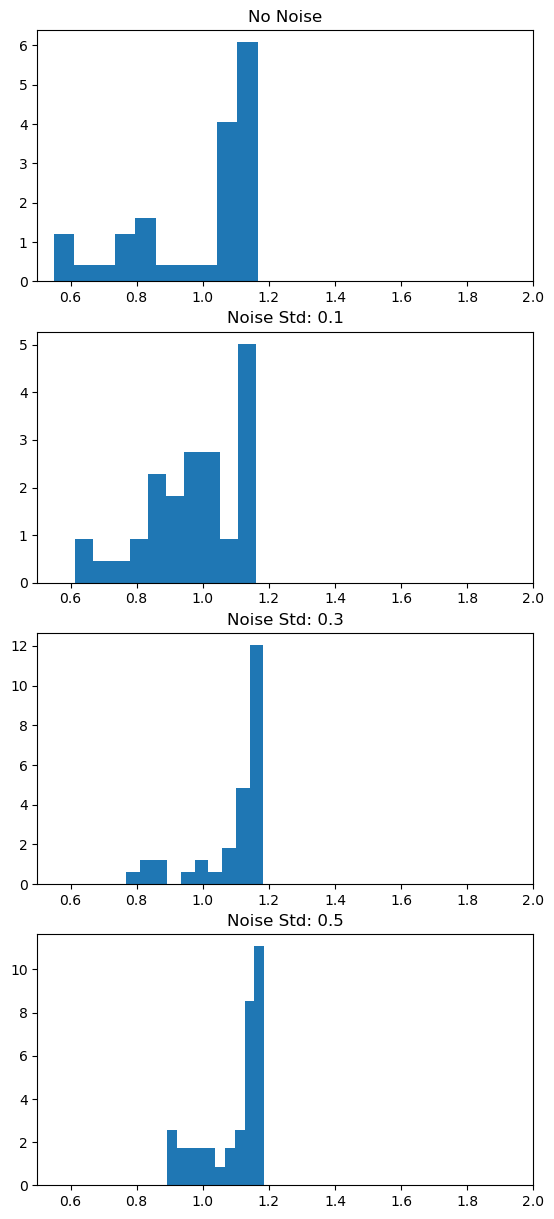

In [16]:
noNoise = results[results["noise layer std"] == "0.0"].RMSE.sort_values().head(40)
wNoise1 = results[results["noise layer std"] == "0.1"].RMSE.sort_values().head(40)
wNoise3 = results[results["noise layer std"] == "0.3"].RMSE.sort_values().head(40)
wNoise5 = results[results["noise layer std"] == "0.5"].RMSE.sort_values().head(40)



fig, ax = plt.subplots(4)
fig.set_figheight(15)

ax[0].hist(noNoise, density=True)
ax[0].title.set_text("No Noise")
ax[1].hist(wNoise1, density = True)
ax[1].title.set_text("Noise Std: 0.1")
ax[2].hist(wNoise3, density =True)
ax[2].title.set_text("Noise Std: 0.3")
ax[3].hist(wNoise5, density =True)
ax[3].title.set_text("Noise Std: 0.5")
plt.setp(ax, xlim=[0.5, 2.0])


In [18]:
print("The mean of noNoise = " + str(noNoise.mean()))
print("The mean of wNoise1 = " + str(wNoise1.mean()))
print("The mean of wNoise3 = " + str(wNoise3.mean()))
print("The mean of wNoise5 = " + str(wNoise5.mean()))
print("")
print("The median of noNoise = " + str(noNoise.median()))
print("The median of wNoise1 = " + str(wNoise1.median()))
print("The median of wNoise3 = " + str(wNoise3.median()))
print("The median of wNoise5 = " + str(wNoise5.median()))
print("")
print("The std of noNoise = " + str(noNoise.std()))
print("The std of wNoise1 = " + str(wNoise1.std()))
print("The std of wNoise3 = " + str(wNoise3.std()))
print("The std of wNoise5 = " + str(wNoise5.std()))

The mean of noNoise = 0.986991149187088
The mean of wNoise1 = 0.9740973234176635
The mean of wNoise3 = 1.0936575546860694
The mean of wNoise5 = 1.0966248705983161

The median of noNoise = 1.0835696458816528
The median of wNoise1 = 0.9770137667655946
The median of wNoise3 = 1.143121063709259
The median of wNoise5 = 1.147760808467865

The std of noNoise = 0.19188207385743766
The std of wNoise1 = 0.14830577809824746
The std of wNoise3 = 0.11467631931315989
The std of wNoise5 = 0.09359307508505559


# Question 4: Residual layer of user information

At first glance there is also nothing of statistical significance


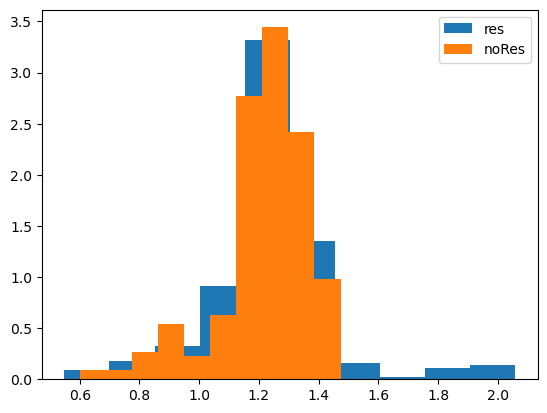

In [43]:
res = results[results["residual user info"] == "True"].RMSE
noRes = results[results["residual user info"] == "False"].RMSE
plt.hist(res, density = True)
plt.hist(noRes, density = True)
plt.legend(['res', 'noRes'])

In [52]:
print("The mean of res = " + str(res.mean()))
print("The mean of noRes = " + str(noRes.mean()))
print("The median of res = " + str(res.median()))
print("The median of noRes = " + str(noRes.median()))
print("The std of res = " + str(res.std()))
print("The std of noRes = " + str(noRes.std()))

The mean of res = 1.2254520019445452
The mean of noRes = 1.2211431004106998
The median of res = 1.197480320930481
The median of noRes = 1.2353034019470215
The std of res = 0.21178267144168972
The std of noRes = 0.15434334454278095


# Question 5: Loss Function

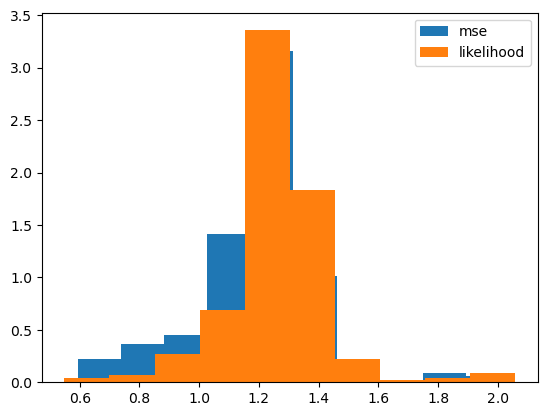

In [53]:
mse = results[results["Recon Loss"] == "MSE"].RMSE
likelihood = results[results["Recon Loss"] == "Likelihood"].RMSE
plt.hist(mse, density = True)
plt.hist(likelihood, density = True)
plt.legend(['mse', 'likelihood'])

In [54]:
print("The mean of mse = " + str(mse.mean()))
print("The mean of likelihood = " + str(likelihood.mean()))
print("The median of mse = " + str(mse.median()))
print("The median of likelihood = " + str(likelihood.median()))
print("The std of mse = " + str(mse.std()))
print("The std of likelihood = " + str(likelihood.std()))

The mean of mse = 1.1887083559986051
The mean of likelihood = 1.2519052733977636
The median of mse = 1.1968330144882202
The median of likelihood = 1.2358994483947754
The std of mse = 0.19720978476586093
The std of likelihood = 0.17278124392906438
